## IA PROJECT ##

### Attribute and object selection ###

We want to do a study on environmental aspect, and "other thing to find". That's why we collected some data on online databank, to make some analysis on it. But first we will need to select the data and adapt it in a way to study it easily.

Loading of all packages we need

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import data_managment as dm
import numpy as np
import seaborn
from outliers import smirnov_grubbs as grubbs


We bering with the import of our dataframe, and the adaption for it to our study

In [108]:
importlib.reload(dm)
originial_df = pd.read_csv("data3.txt", sep="\t")
# df = dm.build_adapted_df(originial_df);df
originial_df.drop(["Country Code", "Time Code","Time"], axis=1, inplace = True)
originial_df.set_index("Country Name", inplace = True)
originial_df[originial_df == ".."] = np.nan
df = originial_df.copy().astype(np.float64)


We can see there are many NaN : We can chose first to eleminate country with many NaN data (over 50% for example) that can bring outlier. But that value can be chose with the following graphic

                                                  NaN_count
International migrant stock (% of population)             8
Life expectancy at birth, total (years)                  16
GDP (constant 2015 US$)                                  12
Urban population (% of total population)                  7
Access to electricity (% of population)                   6
Individuals using the Internet (% of population)         22


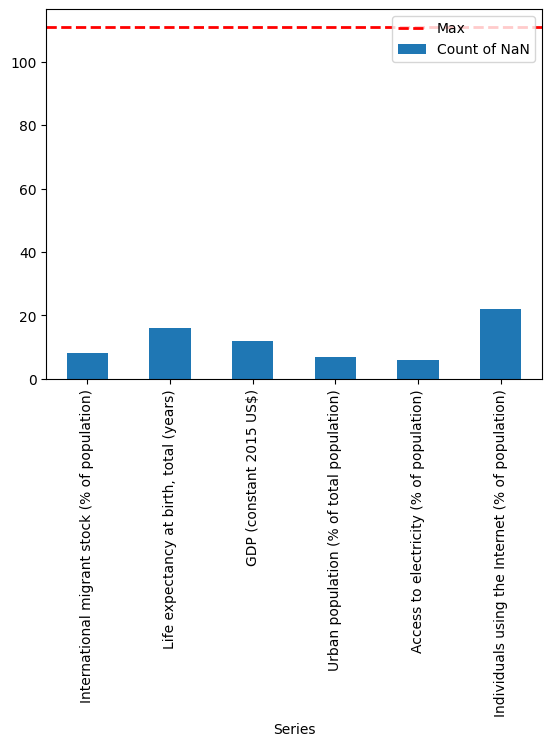

In [110]:
importlib.reload(dm)

df_nb_nan = dm.make_na_count(df,True); print(df_nb_nan)
df_nb_nan["Series"] = df_nb_nan.index
df_nb_nan.plot.bar(y="NaN_count", x = "Series",  label="Count of NaN")
max_nan = df.shape[0]*0.5
plt.axhline(max_nan, color='r', linestyle='dashed', linewidth=2, label="Max")
plt.legend(loc='upper right')

So we delete all series with more that 50% of outliers, meaning thats don't bring enough information to be intersting

In [111]:
importlib.reload(dm)

df_without_na_series = dm.del_many_na_series(df, df_nb_nan, max_nan)

Now, we will check if some country still go NaN values

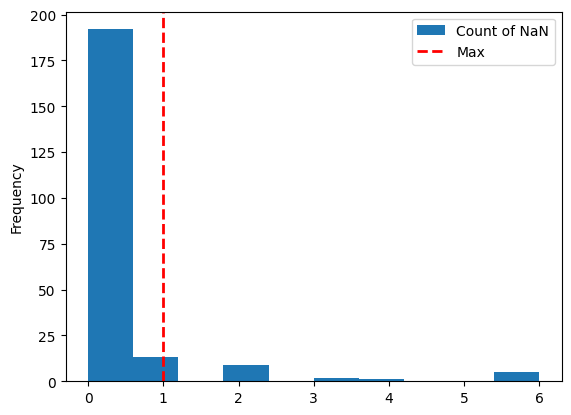

In [112]:
importlib.reload(dm)

df_nb_nan_s = dm.make_na_count(df,False)
df_nb_nan_s["Series"] = df_nb_nan_s.index 
df_nb_nan_s.plot.hist(y="NaN_count",  label="Count of NaN")
max_nan_s = 1
plt.axvline(max_nan_s, color='r', linestyle='dashed', linewidth=2, label="Max")
plt.legend(loc='upper right')

Few country has been removed because still presence of NaN values. 

In [113]:
importlib.reload(dm)

df_without_na_country = dm.del_many_na_country(df_without_na_series, df_nb_nan_s, max_nan_s);df_without_na_country

,International migrant stock (% of population),"Life expectancy at birth, total (years)",GDP (constant 2015 US$),Urban population (% of total population),Access to electricity (% of population),Individuals using the Internet (% of population)
Country Name,,,,,,
Afghanistan,1.175547,62.659000,1.999816e+10,24.803,71.500000,8.260000
Albania,1.989036,78.644000,1.138685e+10,57.434,99.980003,56.900000
Algeria,0.611072,75.622000,1.659793e+11,70.848,99.186661,38.200000
Angola,0.427005,60.655000,8.721930e+10,63.446,42.000000,22.000000
Antigua and Barbuda,30.585506,77.913000,1.336693e+09,25.000,100.000000,70.000000
...,...,...,...,...,...,...
Virgin Islands (U.S.),53.363878,79.017073,3.663000e+09,95.350,100.000000,54.839137
West Bank and Gaza,5.473040,74.406000,1.397240e+10,75.368,99.900002,56.700000
"Yemen, Rep.",1.282529,65.873000,4.244450e+10,34.777,67.310928,24.085409


But we can also replace NaN value by using a clustering estimation by this formula

In [114]:
df_nan_estimate = dm.replace_nan_knn(df_without_na_series); df_nan_estimate ###TODO: A garder ?

,International migrant stock (% of population),"Life expectancy at birth, total (years)",GDP (constant 2015 US$),Urban population (% of total population),Access to electricity (% of population),Individuals using the Internet (% of population)
Country Name,,,,,,
Afghanistan,1.175547,62.659000,1.999816e+10,24.803000,71.500000,8.260000
Albania,1.989036,78.644000,1.138685e+10,57.434000,99.980003,56.900000
Algeria,0.611072,75.622000,1.659793e+11,70.848000,99.186661,38.200000
American Samoa,41.802009,76.665000,6.730000e+08,87.238000,88.127499,39.167028
Andorra,59.713649,77.970000,2.789870e+09,88.345000,100.000000,87.900000
...,...,...,...,...,...,...
NaN,12.016536,72.112817,3.541002e+11,59.923451,83.452441,48.034010
NaN,12.016536,72.112817,3.541002e+11,59.923451,83.452441,48.034010
NaN,12.016536,72.112817,3.541002e+11,59.923451,83.452441,48.034010


We will now check about coreleted data, to do this spearman test is done.

Maintenant on regarde si des données sont corrélé :

<AxesSubplot: >

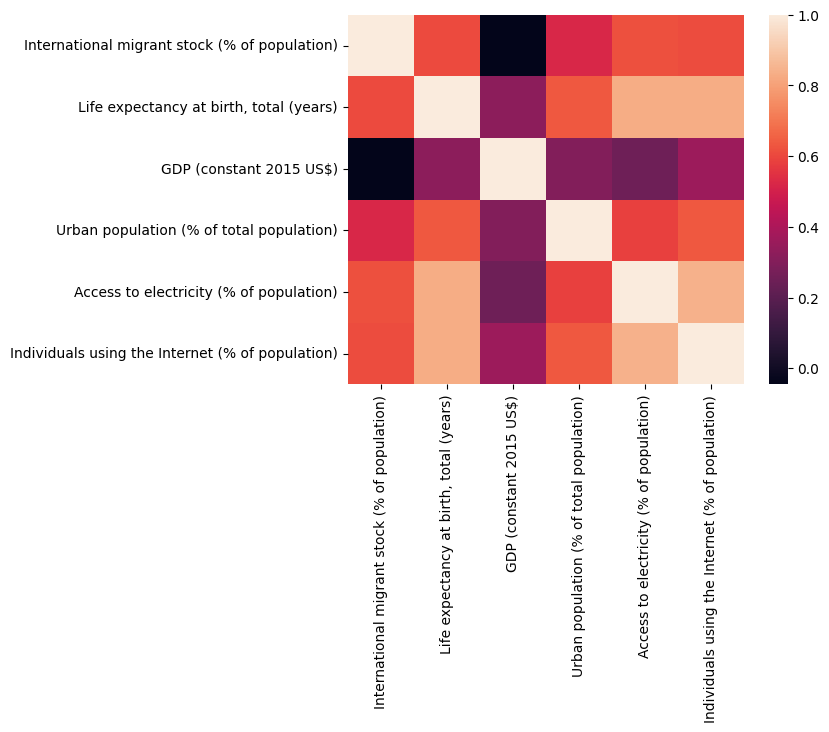

In [115]:
df_corr = df_nan_estimate.corr("spearman", numeric_only = True)
seaborn.heatmap(df_corr)

We this heatmap about contengensis table establish the different possible relation, that we will delete one of the variable when there is 90% absolute correlation effect.
That will be done for both dataframe we have.

<AxesSubplot: >

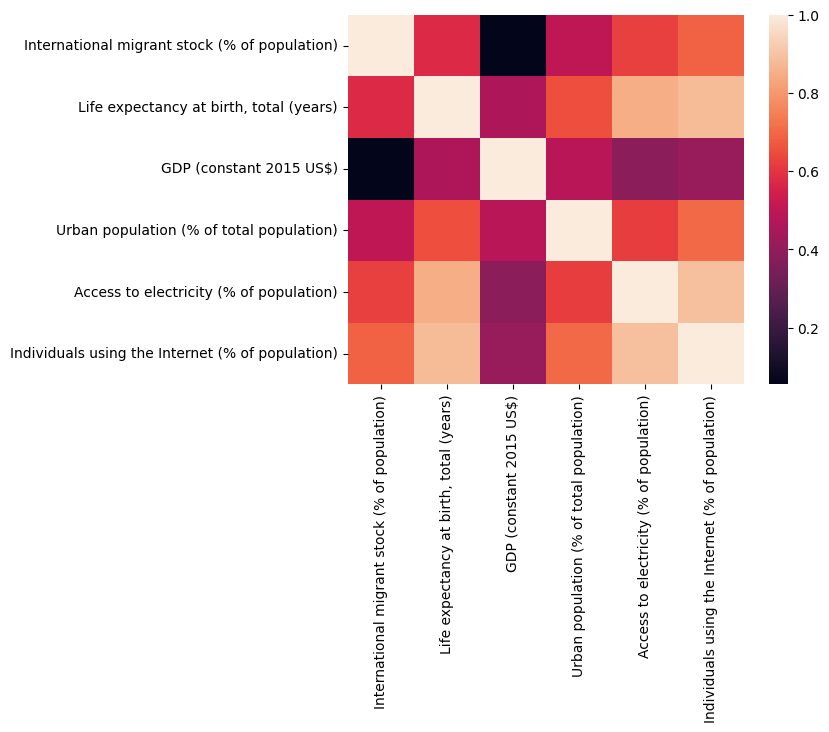

In [116]:
importlib.reload(dm)
df_without_corr_series = dm.del_correled_series(df_without_na_country, df_corr,0.90)
df_nan_estimate_without_corr_series = dm.del_correled_series(df_nan_estimate, df_corr,0.90)
corr_clean = df_without_corr_series.corr("spearman")
seaborn.heatmap(corr_clean)

On compare les deux technique d'élimination des NA : 

In [117]:
df_without_corr_series.corrwith(df_nan_estimate_without_corr_series)

International migrant stock (% of population)       1.0
Life expectancy at birth, total (years)             1.0
GDP (constant 2015 US$)                             1.0
Urban population (% of total population)            1.0
Access to electricity (% of population)             1.0
Individuals using the Internet (% of population)    1.0
dtype: float64

On voit que la correlation entre les deux graphiques sont totales donc pas d'effet

At this step, all data that we considered as useless (with nan values, or correlated data are delete). Because of the variaty of our variable units, but also order of magnitude. We should normalize or data to simplify the Visualization.

In [119]:
importlib.reload(dm)
n_df = dm.normalize_df(df_without_corr_series)
dm.export_clean_data(df_without_corr_series)
dm.export_clean_data(n_df,"normalized_clean_dataframe.csv")


To finish the evaluation of our datasats, outliers can be searched and determined

United States
China
Japan
Germany
United Kingdom
France
India
Italy
Brazil
Canada
Korea, Rep.
Russian Federation
Australia
Spain
Mexico
Turkiye
Indonesia
Netherlands
Switzerland
Saudi Arabia
Argentina
Sweden
Nigeria
Poland
Belgium


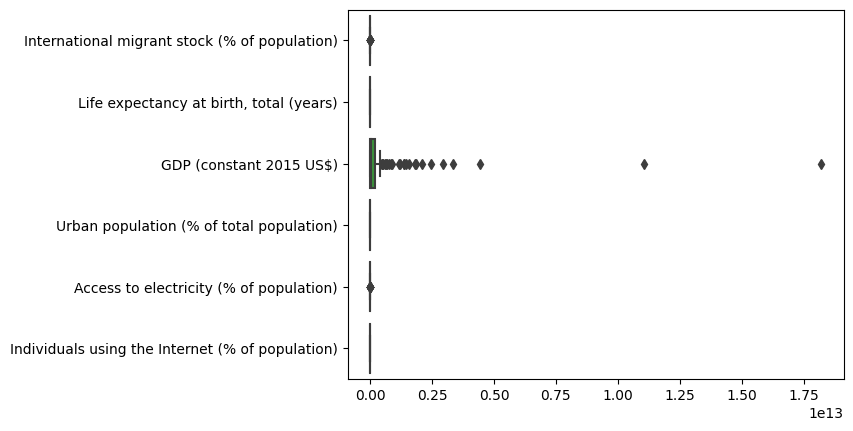

In [122]:
seaborn.boxplot(data=df_without_corr_series, orient = "h")
vals = grubbs.max_test_indices(np.array(df_without_corr_series["GDP (constant 2015 US$)"]), alpha=0.05);vals
for i in vals:
    print(df_without_corr_series.iloc[i].name)
# seaborn.boxplot(data=n_df, orient = "h")

We can see on the plot that there are many outlier, let check if they are stastically significant.

We have found 21 outliers in the series : International migrant stock (% of population)
We have found 0 outliers in the series : Life expectancy at birth, total (years)
We have found 25 outliers in the series : GDP (constant 2015 US$)
We have found 0 outliers in the series : Urban population (% of total population)
We have found 0 outliers in the series : Access to electricity (% of population)
We have found 0 outliers in the series : Individuals using the Internet (% of population)


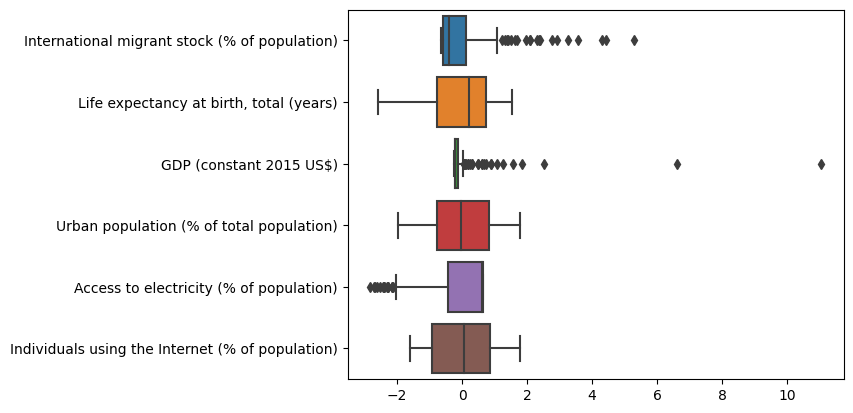

In [130]:
seaborn.boxplot(data=n_df, orient = "h")

outliers_data = {}
for serie in n_df:
    val = np.array(n_df[serie])
    outl = grubbs.max_test_indices(val, alpha=0.05)
    print(f"We have found {len(outl)} outliers in the series : {serie}")
    outliers_data[serie] = outl

Thanks to the Grubbs test, we have found differents outliers on our subdataset. We chose to don't change the reality of our data and so to delete it, but depending on the result we obtain, we can maybe do it to see if there is big change (For example when really big outliars can hide some behaviour in the clusturing). This outliers will also be tested, with an other test during the clusturing.

To have better result on clusturing and classification, we create a dataframe without the outliers we found

We have found 23 outliers in the series : International migrant stock (% of population)
We have found 0 outliers in the series : Life expectancy at birth, total (years)
We have found 24 outliers in the series : GDP (constant 2015 US$)
We have found 0 outliers in the series : Urban population (% of total population)
We have found 0 outliers in the series : Access to electricity (% of population)
We have found 0 outliers in the series : Individuals using the Internet (% of population)


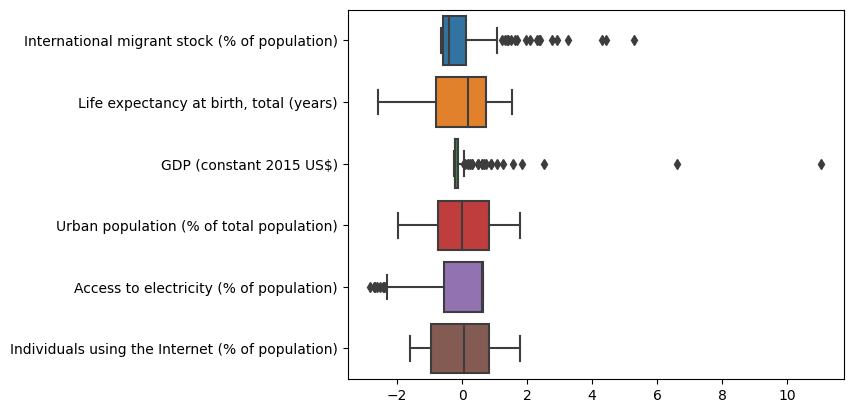

In [132]:
n_df_wo_outliar = n_df.copy()
for series in outliers_data.values():
    for val in series:
        try:
            n_df_wo_outliar.drop(df_without_corr_series.iloc[val].name, axis = 0, inplace=True)
        except KeyError:
            pass
            

outliers_data2 = {}
for serie in n_df_wo_outliar:
    val = np.array(n_df_wo_outliar[serie])
    outl = grubbs.max_test_indices(val, alpha=0.05)
    print(f"We have found {len(outl)} outliers in the series : {serie}")
    outliers_data2[serie] = outl
seaborn.boxplot(data=n_df_wo_outliar, orient = "h")

dm.export_clean_data(n_df_wo_outliar,"normalized_clean_dataframe_wo_outlier.csv")
